Homework 5 : Neural Networ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

plt.style.use("default")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ML/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls"

# Treat blank spaces as missing values
df = pd.read_csv(file_path, na_values=[' ', ''])

df.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convert TotalCharges to numeric and drop rows that couldn't be converted
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Exploring the data
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (7032, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
df.describe(include="all").T.head(25)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Churn
No     5163
Yes    1869
Name: count, dtype: int64

Proportion:
Churn
No     0.734215
Yes    0.265785
Name: count, dtype: float64


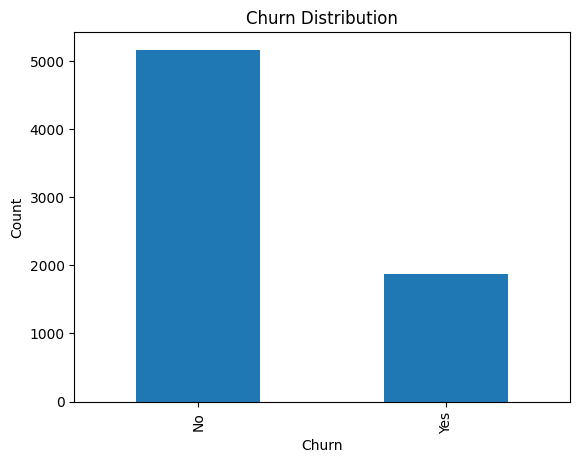

In [ ]:
# Target destribution
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print("\nProportion:")
print(churn_counts / len(df))

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


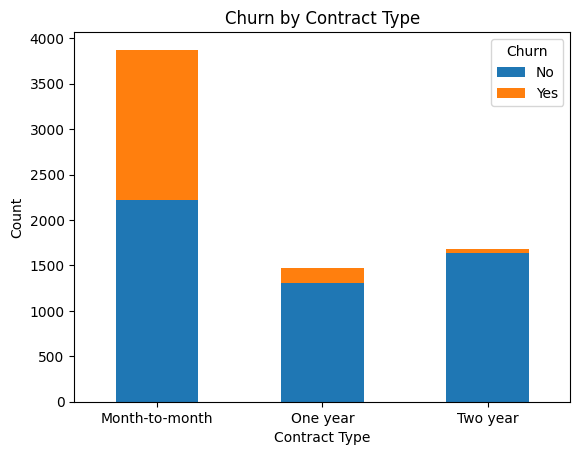

In [ ]:
# Categorial vs target
contract_churn = pd.crosstab(df['Contract'], df['Churn'])

print(contract_churn)

contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

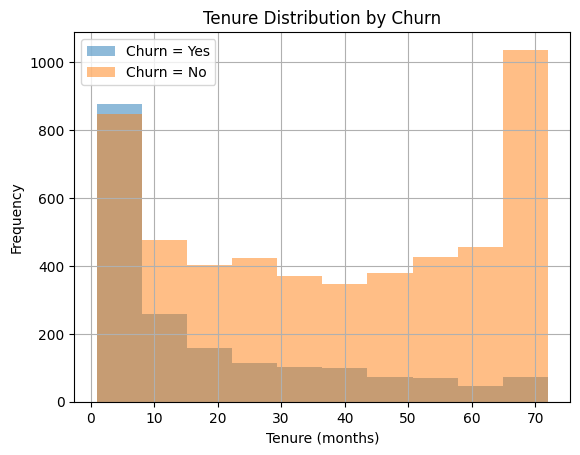

In [ ]:
# Tenure destributiob bt Churn
plt.figure()
df[df['Churn']=='Yes']['tenure'].hist(alpha=0.5, label='Churn = Yes')
df[df['Churn']=='No']['tenure'].hist(alpha=0.5, label='Churn = No')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

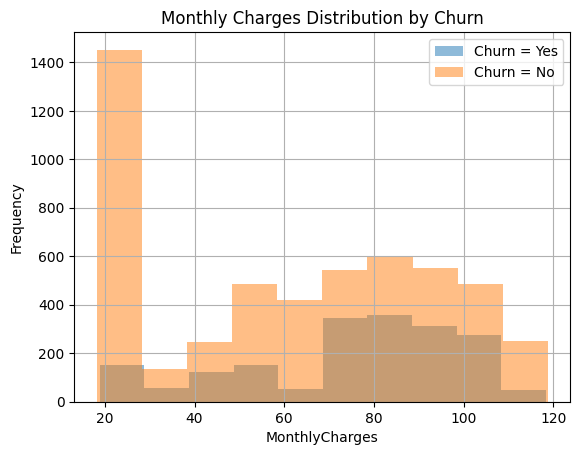

In [ ]:
# Mounthly Charges by Churn
plt.figure()
df[df['Churn']=='Yes']['MonthlyCharges'].hist(alpha=0.5, label='Churn = Yes')
df[df['Churn']=='No']['MonthlyCharges'].hist(alpha=0.5, label='Churn = No')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Prepare features and target for modeling

In [ ]:
# Categorical features
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Numeric features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# One-hot encode categorical features
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine encoded categoricals with numeric columns
X = pd.concat([X_cat, df[num_cols]], axis=1)

# Target
y = df['Churn_encoded']

X.shape, y.shape

((7032, 30), (7032,))

In [ ]:
le = LabelEncoder()
df['Churn_encoded'] = le.fit_transform(df['Churn'])
df[['Churn', 'Churn_encoded']].head()

,Churn,Churn_encoded
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


## Label Encode the 'Churn' Column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((5625, 30), (1407, 30))

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7917555081734187

Confusion Matrix:
 [[894 139]
 [154 220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)

### Model Evaluation Summary

The MLP Classifier achieved an accuracy of approximately **79.18%**.

The `Confusion Matrix` and `Classification Report` reveal that the model is better at predicting customers who **will not churn** (Class 0) with high precision (0.85) and recall (0.87).

However, for predicting customers who **will churn** (Class 1), the performance is lower, with a precision of 0.61 and recall of 0.59. This indicates that while the model correctly identifies 59% of actual churners, it also makes a significant number of false positive and false negative predictions for this class.

This imbalanced performance suggests potential areas for improvement, possibly by tuning model hyperparameters, addressing class imbalance, or experimenting with different model architectures or more data.